In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors,metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

import os,sys
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from matplotlib import rcParams
import statsmodels.api as sm

fixedrstate = 0
sns.set_style('white')
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

In [3]:
df.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Homework answers:

## 1. (b)

In [4]:
df.shape

(9568, 5)

### (b) i.
The Dataset contains **9568** rows and **5** columns
* The rows are instances of features collected over a period of 6 years (2006-2011)
* Each of the column are the hourly average ambient attributes of these instances :
    * Temperature (AT)
    * Ambient Pressure (AP)
    * Relative Humidity (RH) 
    * Exhaust Vacuum (V)  
    * Net Hourly Electrical Energy Output (PE) - This is the dependent variable in our dataset which we are trying to predict using above features

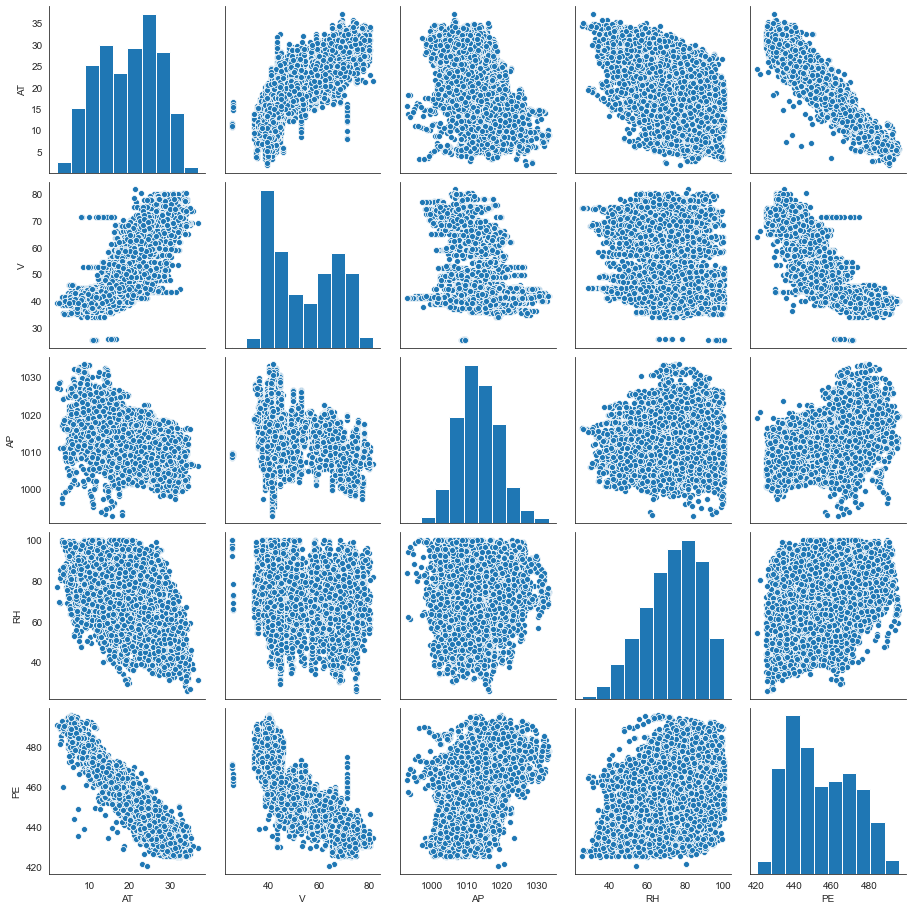

In [5]:
sns.pairplot(df)

### (b) ii. Observations from the pairwise scatterplots
* Temperature (AT) - we observe a strong negative correlation with our response PE from the plots. AT and V seem to have a positive correlation to an strong extent
* Exhaust Vacuum (V) - we observe a similarly negative correlation between PE and V. 
* Ambient Pressure (AP) - We observe a positive but weak correlation between AP and PE 
* Relative Humidity (RH) - Similar to AP, there is a positive correlation but visibly weaker


In [6]:
summary = df.describe().transpose()
#summary.columns

summary['range'] = summary['max'] - summary['min']
summary['interquartile range'] = summary['75%']-summary['25%']
summary['median'] = summary['50%']
summary['first quartile'] = summary['25%']
summary['third quartile'] = summary['75%']


summary[['mean','median','range','first quartile','third quartile','interquartile range']]

,mean,median,range,first quartile,third quartile,interquartile range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (b) iii. The mean, median, range, first quartile(25%), third quartile(75%) and interquartile values for each variable are as mentioned in the above table

## 1. (C) Regression with each predictor

In [7]:
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]
#df.columns

In [8]:
plt.style.use(['seaborn'])

In [9]:
AT = df[df.columns[0]].values.reshape(-1,1)
V = df[df.columns[1]].values.reshape(-1,1)
AP = df[df.columns[2]].values.reshape(-1,1)
RH = df[df.columns[3]].values.reshape(-1,1)

In [10]:
def plot_single_reg(predictor,label,xlabel,varname):
    reg = LinearRegression().fit(predictor,label)
    reg_sm = sm.OLS(label,predictor).fit()
    #print(reg.score(predictor,label))
    y_pred = reg.predict(predictor)
    
    
    cooks = pd.DataFrame(reg_sm.get_influence().summary_frame()['cooks_d'])#,columns=['cooks'])
    threshold = float(4.0/9568.0)#3*np.mean(cooks['cooks_d'])
    cooks_outliers = cooks.loc[cooks['cooks_d']>threshold,:]
    
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
    
    ax1.set_xlabel(xlabel,fontsize=14)
    ax1.set_ylabel('Net Hourly Electrical Energy Output (MW)',fontsize=14)
    ax1.scatter(predictor[:,1],label)
    ax1.plot(predictor[:,1],y_pred,linewidth=3,color='red',label='regression line')

    ax2.set_xlabel('instance number',fontsize=14)
    ax2.set_ylabel('cooks distance',fontsize=14)
    ax2.plot(range(1,9569),cooks['cooks_d'])
    #ax2.plot(range(1,9569),[(threshold)]*9568,color='red',label='threshold line')
    # Uncomment above line to plot the threshold for cook's distance

    
    #print(cooks.iloc[121])
    #print(float(4.0/9568.0))
    print('Simple regression Model Predicting PE using '+varname)
    print(reg_sm.summary())
    print('Number of potential* outlier instances based on threshold (4/n): ',cooks_outliers.shape[0])
    print('n is the number of instances')
    #print(max(cooks_outliers['cooks_d']))
    ax1.legend(fontsize=14)
    #ax2.legend(fontsize=14)
    plt.subplots_adjust(right=3,top=2)
    
    return reg.coef_#,cooks

Simple regression Model Predicting PE using AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:37:45   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

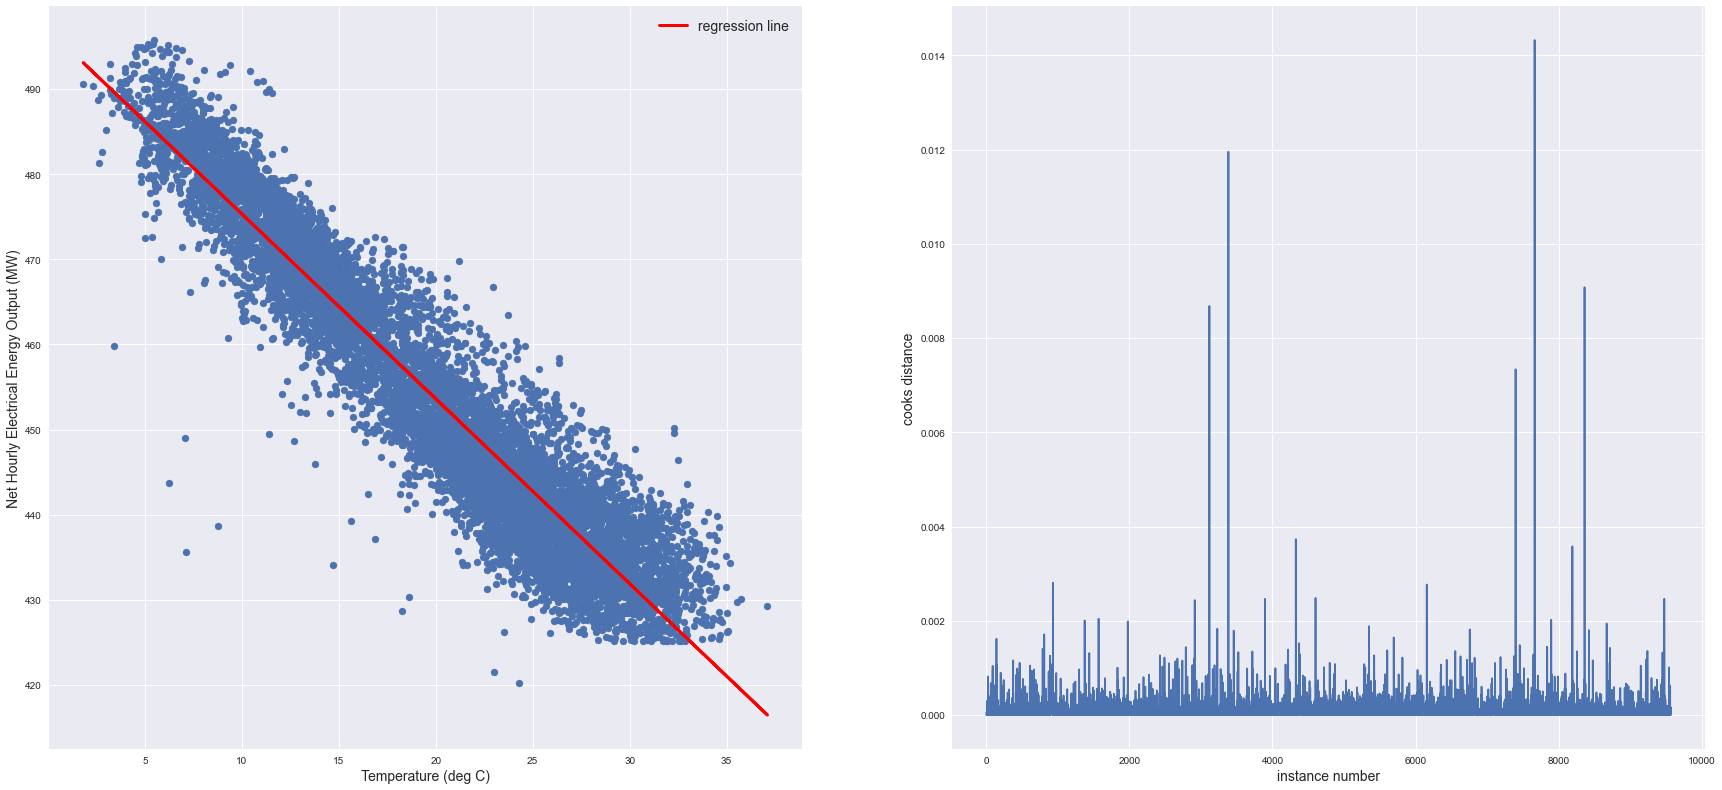

In [11]:
AT_w_const = sm.add_constant(AT)
s_AT_coef = plot_single_reg(AT_w_const,Y,'Temperature (deg C)','AT')

Simple regression Model Predicting PE using V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:37:55   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

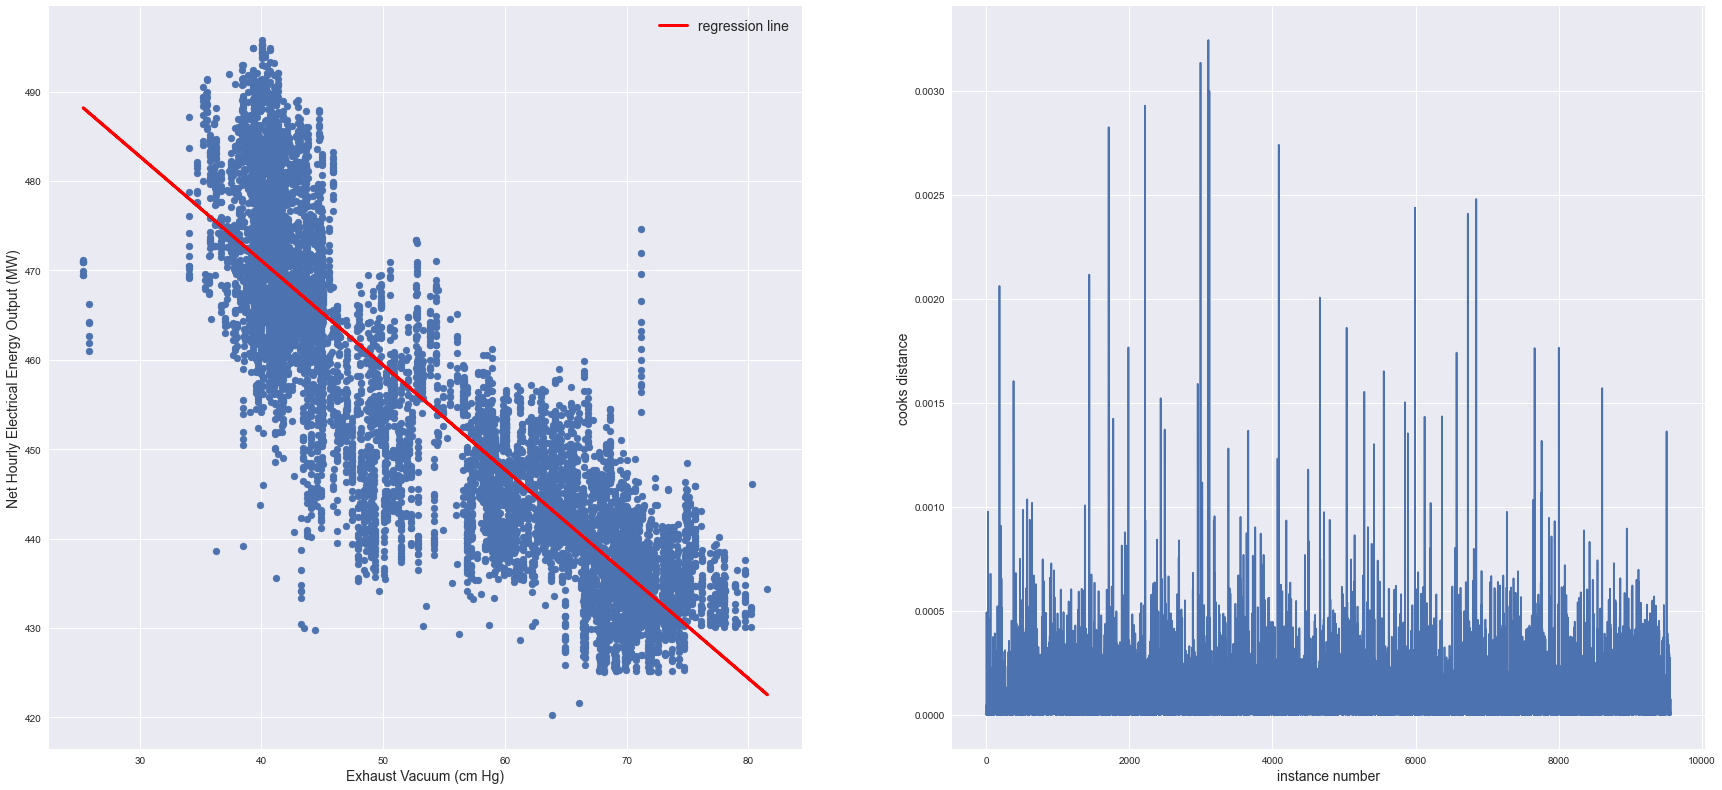

In [12]:
V_w_const = sm.add_constant(V)
s_V_coef = plot_single_reg(V_w_const,Y,'Exhaust Vacuum (cm Hg)','V')

Simple regression Model Predicting PE using AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:05   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

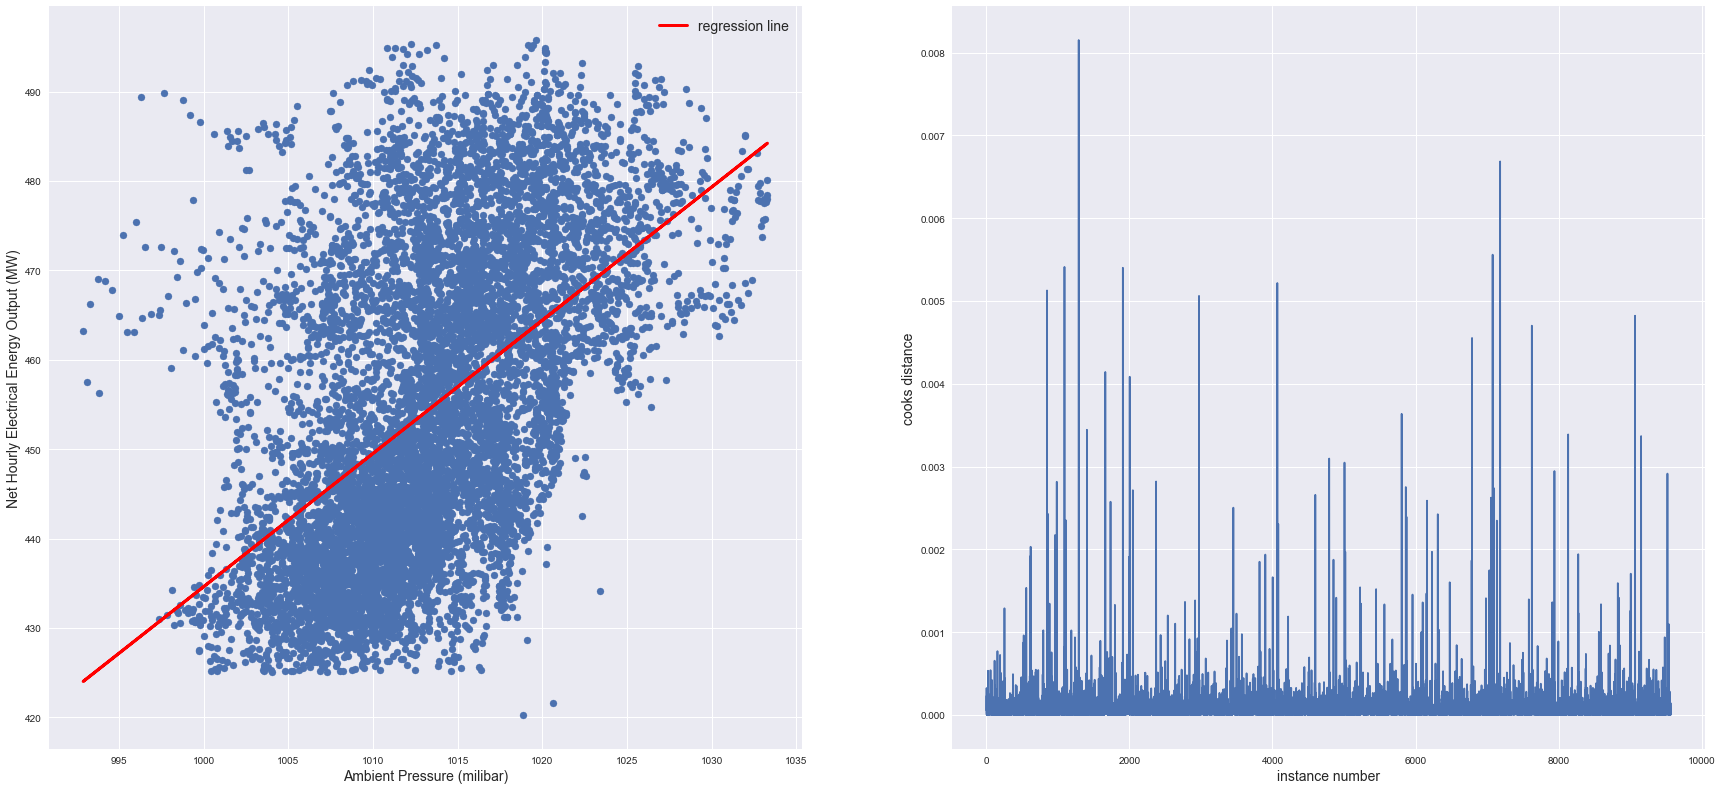

In [13]:
AP_w_const = sm.add_constant(AP)
s_AP_coef = plot_single_reg(AP_w_const,Y,'Ambient Pressure (milibar)','AP')

Simple regression Model Predicting PE using RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

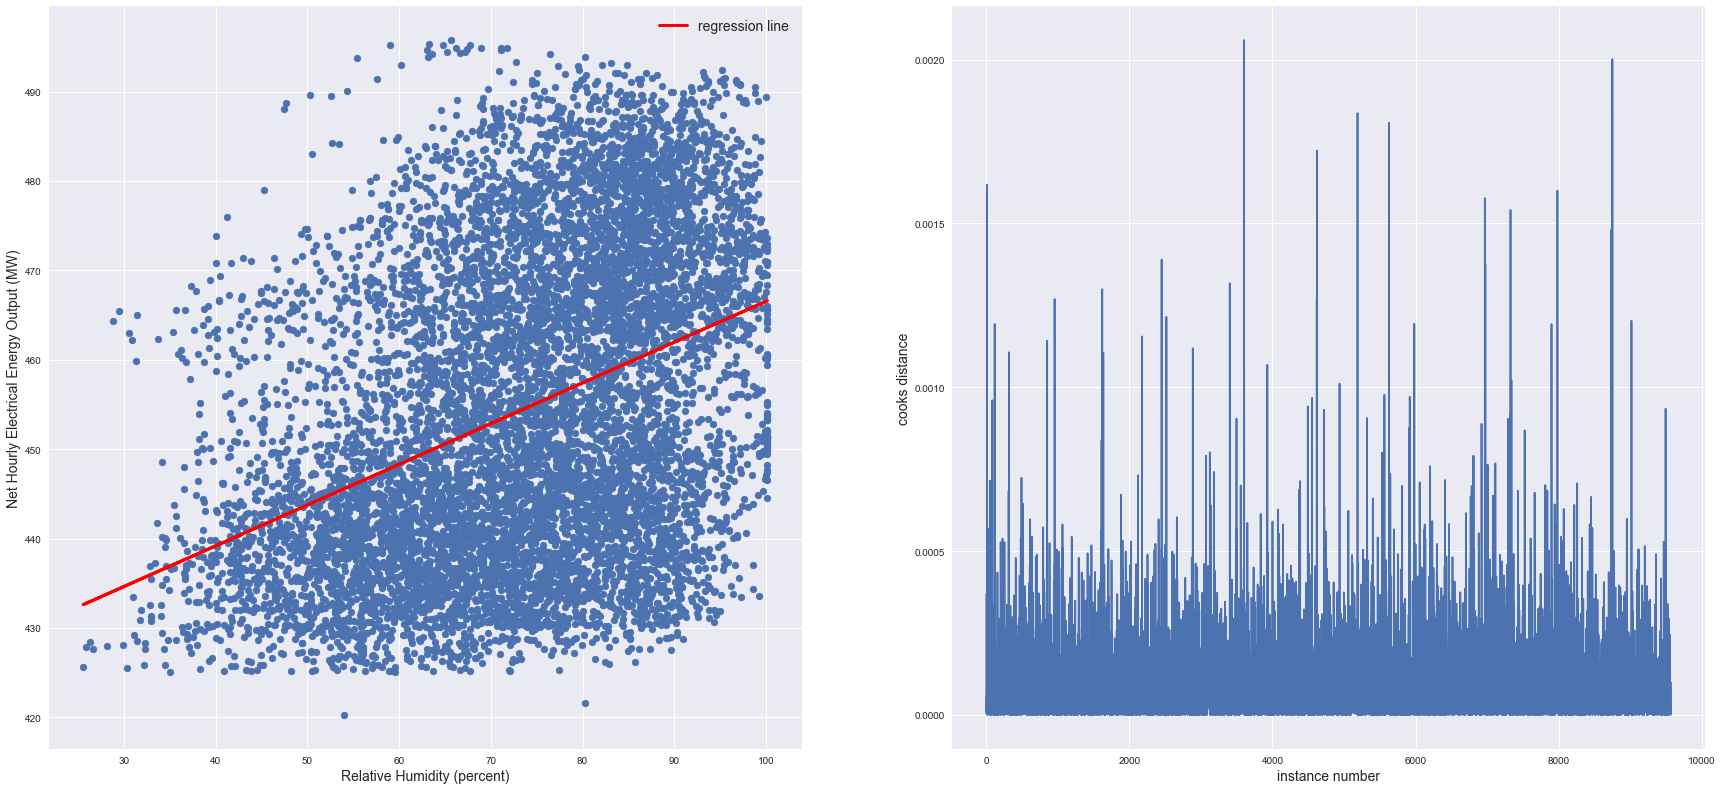

In [14]:
RH_w_const = sm.add_constant(RH)
s_RH_coef = plot_single_reg(RH_w_const,Y,'Relative Humidity (percent)','RH')

#### Explanation
* From the above plots and summaries we can see that all the predictors (AT,V,AP,RH) have statistically significant  association with our response (PE) as p-values for all these is <0.0001
* From the plots of cooks distance we observe that the distances are overall quite small but some of the instances have higher values relatively.
* however their leverages (extremity on X axis) being low does not demand a deletion unless explored further.
* I have listed some estimates based on the cook's distance threshold of 4/n (n = # of instances) which could be potenially outliers but one cannot be sure as cook's distance only specifies high influence but not high leverage.
* *only the points found with high leverage and high influence (after inspecting the data point) must be removed in order to not lose important information.


## 1. (d) Multiple Regression

In [15]:
X_multireg = sm.add_constant(X)
model = sm.OLS(Y,X_multireg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

According to the p-values, we can see that each of our predictor has a significance in predicting the response, so we can reject the null for all of our predictors as p-value < 0.05 for each of them.

## 1. (e) Univariate vs Multivariate Coefficients

In [16]:
const,m_AT_coef,m_V_coef,m_AP_coef,m_RH_coef = (model.params)
single_reg_coef = pd.Series([s_AT_coef[1],s_V_coef[1],s_AP_coef[1],s_RH_coef[1]])
multiple_reg_coef = pd.Series([m_AT_coef,m_V_coef,m_AP_coef,m_RH_coef])

In [17]:
multiple_reg_coef

0   -1.977513
1   -0.233916
2    0.062083
3   -0.158054
dtype: float64

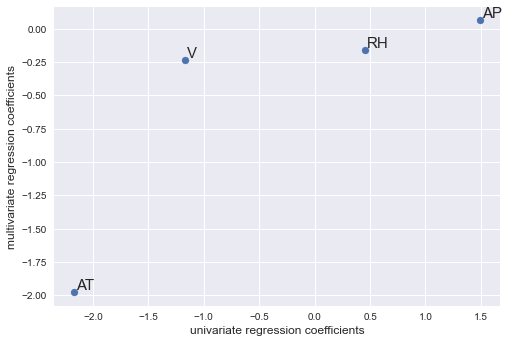

In [18]:
plt.annotate('AT',(s_AT_coef[1]+0.02,m_AT_coef+0.02),fontsize=15)
plt.annotate('V',(s_V_coef[1]+0.02,m_V_coef+0.02),fontsize=15)
plt.annotate('AP',(s_AP_coef[1]+0.02,m_AP_coef+0.02),fontsize=15)
plt.annotate('RH',(s_RH_coef[1]+0.02,m_RH_coef+0.02),fontsize=15)
plt.xlabel('univariate regression coefficients',fontsize=12)
plt.ylabel('multivariate regression coefficients',fontsize=12)

plt.scatter(single_reg_coef,multiple_reg_coef)


* The coefficients for AT seems to show similar values in both single and multiple linear regresion models.
* However the other 3 predictors seem to show a drastic variation since V is far more significant in multivariate linear regression than single linear regression. 
* For RH, the coefficient has changed signs (+ in univariate and - in multivariate)
* For AP, the coefficient is closer to 1.5 in univariate linear regression and closer to 0 in multivariate linear regression

## 1. (f) Find if there is non-linear association

In [19]:
def polynomialfeature(predictor,label):
    poly = PolynomialFeatures(3)
    features = poly.fit_transform(predictor)
    #print(poly.get_feature_names(label))
    features = pd.DataFrame(features,columns=poly.get_feature_names([label]))
    #features
    nl_model = sm.OLS(Y,features).fit()
    print(nl_model.summary())
    return features

In [20]:
print('Polynomial Regression with AT')
AT_polyfeatures = polynomialfeature(AT,'AT')

Polynomial Regression with AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            492.7281 

The quadratic and cubic term for AT is statistically significant and suggests non-linear association

In [21]:
print('Polynomial Regression with V')
V_polyfeatures = polynomialfeature(V,'V')

Polynomial Regression with V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            554.1468  

The cubic term for V is statistically significant and suggests non-linear association

In [22]:
print('Polynomial Regression with AP')
AP_polyfeatures = polynomialfeature(AP,'AP')

Polynomial Regression with AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.0747 

The quadratic and cubic term for AP is statistically significant and suggests non-linear association

In [23]:
print('Polynomial Regression with RH')
RH_polyfeatures = polynomialfeature(RH,'RH')

Polynomial Regression with RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            468.4135 

The quadratic and cubic term for RH is statistically significant and suggests  non-linear association

## 1. (g) Interaction terms

In [24]:
interaction_poly = PolynomialFeatures(2,interaction_only=True)

features = interaction_poly.fit_transform(X)
features = pd.DataFrame(features,columns=interaction_poly.get_feature_names(df.columns))

int_model = sm.OLS(Y,features).fit()
print(int_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            685.7825     78.640      8.721      0.0


#### The following interaction terms are statistically significant  ***(p-value<0.05)***:
1. AT V  
2. AT RH
3. V AP 
4. AP RH

## 1. (h)

### Base Model with all predictors

In [25]:
# Base Model with 4 original predictors and const
X_multireg_train,X_multireg_test,y_train,y_test = train_test_split(X_multireg,Y,test_size=0.3,random_state=fixedrstate)

MR_model = sm.OLS(y_train,X_multireg_train).fit()
print(MR_model.summary())
MR_y_train_pred = MR_model.predict(X_multireg_train)
MR_y_pred = MR_model.predict(X_multireg_test)

print('Train Error',sm.tools.eval_measures.mse(y_train,MR_y_train_pred))
print('Test Error',sm.tools.eval_measures.mse(y_test,MR_y_pred))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:16   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        448.5613     11.745     38.192      0.0

### Model with all interaction and quadratic terms

In [26]:
# All features model
Allfeatures_X = deepcopy(X)

# Adding the quadratic terms
Allfeatures_X[AT_polyfeatures.columns[2]] = AT_polyfeatures[AT_polyfeatures.columns[2]]
Allfeatures_X[V_polyfeatures.columns[2]] = V_polyfeatures[V_polyfeatures.columns[2]]
Allfeatures_X[AP_polyfeatures.columns[2]] = AP_polyfeatures[AP_polyfeatures.columns[2]]
Allfeatures_X[RH_polyfeatures.columns[2]] = RH_polyfeatures[RH_polyfeatures.columns[2]]

# Adding interaction terms
Allfeatures_X[features.columns[5:]] = features[features.columns[5:]]

# Adding the constant term
Allfeatures_X = sm.add_constant(Allfeatures_X)

In [27]:
# Split train/test into 0.7/0.3
Allfeatures_X_train,Allfeatures_X_test = train_test_split(Allfeatures_X,test_size=0.3,random_state=fixedrstate)

In [28]:
allfeatures_model = sm.OLS(y_train,Allfeatures_X_train).fit()
print(allfeatures_model.summary())

Allfeatures_y_train_pred = allfeatures_model.predict(Allfeatures_X_train)
Allfeatures_y_pred = allfeatures_model.predict(Allfeatures_X_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:17   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.0

In [29]:
print('Train Error',sm.tools.eval_measures.mse(y_train,Allfeatures_y_train_pred))
print('Test Error',sm.tools.eval_measures.mse(y_test,Allfeatures_y_pred))
#18.212836451542195
#17.2942028237694

Train Error 18.366012211970897
Test Error 17.52016099751252


We observe that the Train and Test errors for the new are both lower compared to the previous model and the test error being significantly better suggests possibly lesser overfitting.

### Model obtained after
**Pruning Insignificant terms**

In [30]:
Allfeatures_X_train = Allfeatures_X_train.drop(['AT AP','V AP','V RH','V^2'],axis=1)
Allfeatures_X_test = Allfeatures_X_test.drop(['AT AP','V AP','V RH','V^2'],axis=1)

In [31]:
allfeatures_model = sm.OLS(y_train,Allfeatures_X_train).fit()
print(allfeatures_model.summary())

Allfeatures_y_train_pred = allfeatures_model.predict(Allfeatures_X_train)
Allfeatures_y_pred = allfeatures_model.predict(Allfeatures_X_test)

print('Train Error',sm.tools.eval_measures.mse(y_train,Allfeatures_y_train_pred))
print('Test Error',sm.tools.eval_measures.mse(y_test,Allfeatures_y_pred))
min_reg_MSE = sm.tools.eval_measures.mse(y_test,Allfeatures_y_pred)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9892.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:38:17   Log-Likelihood:                -19255.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6686   BIC:                         3.861e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.001e+04   1121.577     -8.921      0.0

From the above Train and Test Errors , we can see that the model improves significantly when interaction and quadratic terms are included.
* The Best Test MSE in base model (involving all predictors) : 20.36838300288591 
* The Best Test MSE obtained after including interaction and quadratic terms : 17.52016099751252
* The Best Test MSE obtained after pruning insignificant terms from above model : 17.565669596605325

The train MSE has also improved from **20.94** in base model to **18.36** in the model involving interaction and quadratic terms.
* This overall improvement may suggest a lack of overfitting due to interaction and quadratic terms being included

## 1. (i) KNN Regression

In [32]:
#Splitting the dataframe into 70% train 30% test
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=fixedrstate)

In [33]:
#from sklearn.preprocessing import Normalizer
#normalizer = Normalizer(norm='max')

#X_train_norm = pd.DataFrame(normalizer.transform(X_train),columns=['AT', 'V', 'AP', 'RH'])
#X_test_norm = pd.DataFrame(normalizer.transform(X_test),columns=['AT', 'V', 'AP', 'RH'])

### KNN regression with raw features

In [34]:
## Raw Parameters

df_k_error = []
for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train,y_train)
    #print(neigh.get_params())
    
    y_pred_train = neigh.predict(X_train)
    y_pred_test = neigh.predict(X_test)
    
    tr_MSE = mean_squared_error(y_train, y_pred_train)
    tst_MSE = mean_squared_error(y_test, y_pred_test)
    
    
    df_k_error.append({'k':i, 'r_train_MSE':tr_MSE,'r_test_MSE':tst_MSE})
raw_df_k_error = pd.DataFrame(df_k_error)
#df_k_error



In [35]:
raw_df_k_error.loc[raw_df_k_error['r_test_MSE']==min(raw_df_k_error['r_test_MSE'])]

,k,r_train_MSE,r_test_MSE
4,5,10.826428,15.663505


### KNN regression with normalized features

In [36]:
from sklearn.preprocessing import Normalizer
normalizer = preprocessing.MinMaxScaler()

X_train_norm = pd.DataFrame(normalizer.fit_transform(X_train),columns=['AT', 'V', 'AP', 'RH'])
X_test_norm = pd.DataFrame(normalizer.fit_transform(X_test),columns=['AT', 'V', 'AP', 'RH'])
#normalized parameters
df_k_error = []
for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train_norm,y_train)
    #print(neigh.get_params())
    
    norm_y_pred_train = neigh.predict(X_train_norm)
    norm_y_pred_test = neigh.predict(X_test_norm)
    
    tr_MSE = mean_squared_error(y_train, norm_y_pred_train)
    tst_MSE = mean_squared_error(y_test, norm_y_pred_test)
    
    
    df_k_error.append({'k':i, 'n_train_MSE':tr_MSE,'n_test_MSE':tst_MSE})
norm_df_k_error = pd.DataFrame(df_k_error)
#df_k_error

In [37]:
norm_df_k_error.loc[norm_df_k_error['n_test_MSE']==min(norm_df_k_error['n_test_MSE'])]

,k,n_train_MSE,n_test_MSE
5,6,10.49252,14.659682


In [38]:
#min(norm_df_k_error['n_test_MSE'])

In [39]:
plot_df = raw_df_k_error.merge(norm_df_k_error, on=['k'])

### KNN Regression (Raw Features) Train and Test MSE 

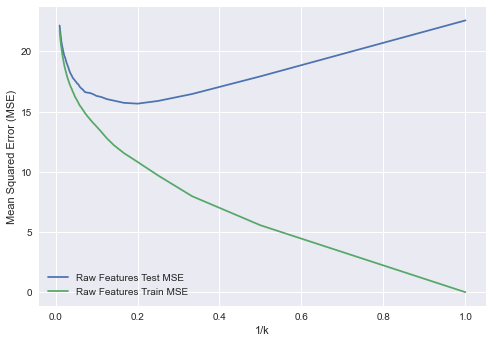

In [40]:
plt.style.use(['seaborn'])
plt.plot(1/plot_df['k'],plot_df['r_test_MSE'],label='Raw Features Test MSE')
plt.plot(1/plot_df['k'],plot_df['r_train_MSE'],label='Raw Features Train MSE')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')
#plt.plot(1/plot_df['k'],plot_df['n_train_MSE'],label='Normalized Train MSE')
#plt.plot(1/plot_df['k'],plot_df['n_test_MSE'],label='Normalized Test MSE')
plt.legend()

### KNN Regression (Normalized Features) Train and Test MSE 

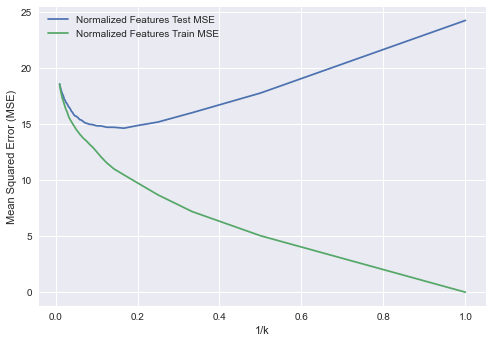

In [41]:
#plt.style.use(['seaborn'])
plt.plot(1/plot_df['k'],plot_df['n_test_MSE'],label='Normalized Features Test MSE')
plt.plot(1/plot_df['k'],plot_df['n_train_MSE'],label='Normalized Features Train MSE')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

## 1. (j) Comparing Models

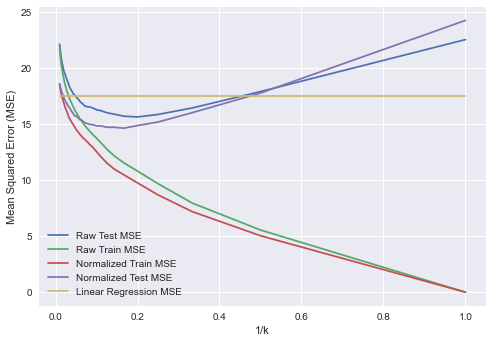

In [42]:
plt.plot(1/plot_df['k'],plot_df['r_test_MSE'],label='Raw Test MSE')
plt.plot(1/plot_df['k'],plot_df['r_train_MSE'],label='Raw Train MSE')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error (MSE)')
plt.plot(1/plot_df['k'],plot_df['n_train_MSE'],label='Normalized Train MSE')
plt.plot(1/plot_df['k'],plot_df['n_test_MSE'],label='Normalized Test MSE')
plt.plot(1/plot_df['k'],[min_reg_MSE]*100,label='Linear Regression MSE')
plt.legend()

* Minimum MSE for Linear Regression : 17.52016099751252
* Minimum MSE for raw features KNN regression (k=5) : 15.663505
* Minimum MSE for normalized features KNN regression (k=6) : **14.659682**

From the above comparison we can see that **KNN regression with normalized features** works best amongst all of the variants tried for this particular (70/30) split of the dataset.

The difference between KNN regression with raw features and normalized features is not that different, the slight improvement can be attributed to the fact that normalization tries to nullify the difference in scales between the attributes.

The KNN regressor performs better than the linear regressor but does not tell us which predictors are important whereas the linear regressor is much more interpretable in this regard.

## 2. ISLR: 2.4.1

* a) The flexible model will perform **better** with large number of samples since this reduces the risk of overfitting and flexible models have low bias.
* b) The flexible model will perform **worse** since the less number of samples adds the risk of overfitting when predictors are less. A flexible model may imply High variance is such a case 
* c) The flexible model will perform **better** since we need the flexibility to fit a non-linear relationship as compared to an inflexible model
* d) As flexible models imply higher variance, for a situation like this a flexible model performs **worse** than an inflexible model since the inflexible model will be less susceptible to noise as compared to the flexible model. A flexible model might be too wiggly due to the noise.

## 3. ISLR: 2.4.7

* a) The distances are:

| Observation | Euclidean Distance   |
|------|------|
| 1 | 3| 
| 2 | 2 | 
| 3 |  3.16 |
| 4 | 2.23 |
| 5 | 1.41 |
| 6 | 1.73 |

* b) Green , since the closest point [-1,0,1] is classified as Green
* c) Red, with the k=3 closest points i.e 1.41(Green) ,1.73(Red) and 2(Red) result in classification as Red
* d) Small because as k increases, the flexibility of the model decreases and hence capturing a non-linear boundry is inefficient with large k.